In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
df = pd.read_csv(r"D:\Excel\sonar_dataset.csv",header=None)

In [97]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [98]:
df.shape

(208, 61)

In [99]:
df.size

12688

In [100]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [101]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [102]:
X = df.drop(60, axis =1)
y= df[60]

In [103]:
df[60].replace({'R':0, 'M':1}, inplace=True)

C:\Users\91701\AppData\Local\Temp\ipykernel_25588\3250595061.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[60].replace({'R':0, 'M':1}, inplace=True)


In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [105]:
X_train.shape,y_train.shape

((166, 60), (166,))

In [106]:
import tensorflow as tf
from tensorflow import keras


In [107]:
model = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer= 'adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size=8)


Epoch 1/100


C:\Users\91701\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5069 - loss: 0.6941   
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6137 - loss: 0.6554 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - loss: 0.6461 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 0.6077 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7207 - loss: 0.5893 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 0.5366 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4819 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.4600 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.4719 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.4028 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3946 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [108]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7842 - loss: 0.9221 


[0.9240511655807495, 0.7857142686843872]

In [121]:
y_predict = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [110]:
y_predict = np.round(y_predict)

In [111]:
y_predict[:10].reshape(-1)

array([1., 0., 1., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [112]:
y_test[:10]

186    1
155    1
165    1
200    1
58     0
34     0
151    1
18     0
202    1
62     0
Name: 60, dtype: int64

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.72      0.90      0.80        20

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.81      0.79      0.78        42



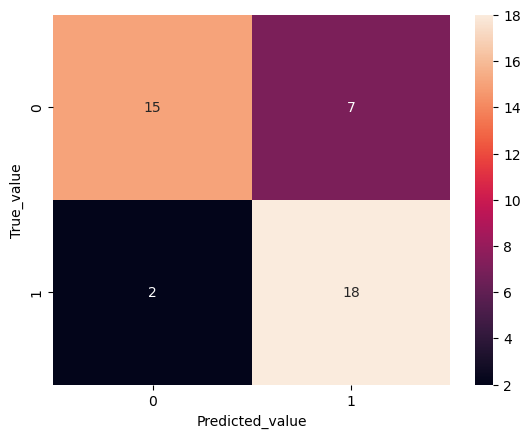

In [114]:
cm = tf.math.confusion_matrix (y_test,y_predict)
sns.heatmap(cm, annot=True ,fmt ='d')
plt.xlabel('Predicted_value')
plt.ylabel('True_value')
plt.show()

In [115]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])
modeld.compile(optimizer= 'adam', loss='binary_crossentropy',metrics=['accuracy'])
modeld.fit(X_train, y_train, epochs =99, batch_size=8)

Epoch 1/99


C:\Users\91701\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5592 - loss: 0.7041
Epoch 2/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6169 - loss: 0.6365 
Epoch 3/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 0.6824 
Epoch 4/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5415 - loss: 0.6801 
Epoch 5/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4548 - loss: 0.7366 
Epoch 6/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5342 - loss: 0.6819 
Epoch 7/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5185 - loss: 0.6922 
Epoch 8/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4074 - loss: 0.7091 
Epoch 9/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5355 - loss: 0.6808 
Epoch 10/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.7041 
Epoch 11/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6210 - loss: 0.6857 
Epoch 12/99
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5119 - los

In [116]:
modeld.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7054 - loss: 0.5535 


[0.5280229449272156, 0.7142857313156128]

In [117]:
y_pred = modeld.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [118]:
y_pred = np.round(y_pred)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.67      0.80      0.73        20

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.72      0.71      0.71        42



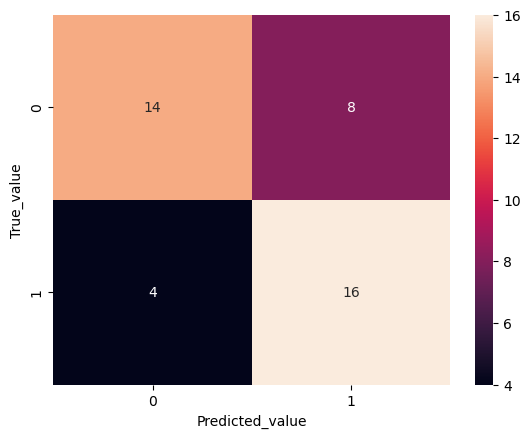

In [122]:
cm1 = tf.math.confusion_matrix (y_test,y_pred)
sns.heatmap(cm1, annot=True ,fmt ='d')
plt.xlabel('Predicted_value')
plt.ylabel('True_value')
plt.show()